In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("/content/drive/My Drive/DataSet/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. All Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
##Missing Values 
miss_val=[feature for feature in df.columns if( df[feature].isna().sum() > 1 ) ]
for miss in miss_val:
  print("Feature : " + miss + " missing Percentage --> " , round(df[miss].isna().sum() / len( df[miss] ) ,5) )

##All Numerical Variables 
All_numeric=[feature for feature in df.columns if (df[feature].dtypes != 'O')  ]
print("\n\nUnique Numerical --> " , len(All_numeric))

for _feature in All_numeric:
  print("Feature " + _feature + " Total Uniques --> " , df[_feature].nunique())

##All Categorical Variables 
All_Categorical= [ feature for feature in df.columns if ( df[feature].dtypes == 'O' ) ] 
print("\n\nUnique Categorical --> ",len(All_Categorical))
for _feature in All_Categorical:
  print("Feature " + _feature + " Total Unqiues " , df[_feature].nunique() )   

Feature : LotFrontage missing Percentage -->  0.1774
Feature : Alley missing Percentage -->  0.93767
Feature : MasVnrType missing Percentage -->  0.00548
Feature : MasVnrArea missing Percentage -->  0.00548
Feature : BsmtQual missing Percentage -->  0.02534
Feature : BsmtCond missing Percentage -->  0.02534
Feature : BsmtExposure missing Percentage -->  0.02603
Feature : BsmtFinType1 missing Percentage -->  0.02534
Feature : BsmtFinType2 missing Percentage -->  0.02603
Feature : FireplaceQu missing Percentage -->  0.4726
Feature : GarageType missing Percentage -->  0.05548
Feature : GarageYrBlt missing Percentage -->  0.05548
Feature : GarageFinish missing Percentage -->  0.05548
Feature : GarageQual missing Percentage -->  0.05548
Feature : GarageCond missing Percentage -->  0.05548
Feature : PoolQC missing Percentage -->  0.99521
Feature : Fence missing Percentage -->  0.80753
Feature : MiscFeature missing Percentage -->  0.96301


Unique Numerical -->  38
Feature Id Total Uniques --

In [69]:
## Analyze Variables Distribution 
## Take The Discrete Variables/features
Date_Var=[Feature for Feature in All_numeric if ("Yr" in Feature or "Year" in Feature) ] 
Discrete_var=[Feature for Feature in All_numeric if (   df[Feature].nunique() < 25  and Feature not in Date_Var + ["Id"] )  ]
Continues_var=[Feature for Feature in All_numeric if ( Feature not in Discrete_var + Date_Var + ["Id"] ) ]

for _f in Date_Var:
  print(_f,df[_f].nunique())
print("Len --> ",len(Date_Var))  
print("\n\n")  

for _f in Discrete_var:
  print(_f ,df[_f].nunique())

print("Len --> ",len(Discrete_var))
print("\n\n")  

for _f in Continues_var:
  print(_f,df[_f].nunique())                                                        
print("Len --> ",len(Continues_var))




YearBuilt 112
YearRemodAdd 61
GarageYrBlt 97
YrSold 5
Len -->  4



MSSubClass 15
OverallQual 10
OverallCond 9
LowQualFinSF 24
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
3SsnPorch 20
PoolArea 8
MiscVal 21
MoSold 12
Len -->  17



LotFrontage 110
LotArea 1073
MasVnrArea 327
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
GrLivArea 861
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
ScreenPorch 76
SalePrice 663
Len -->  16


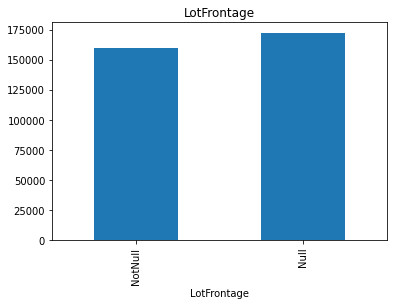

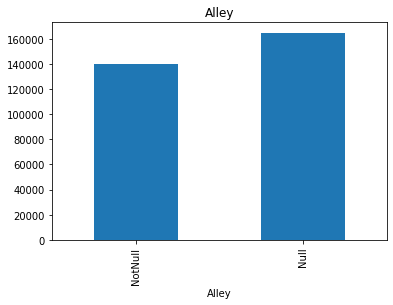

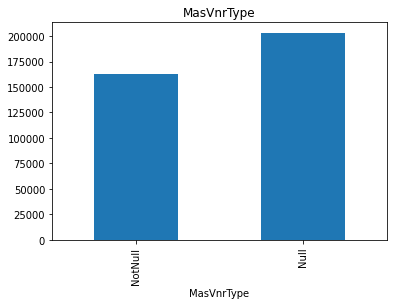

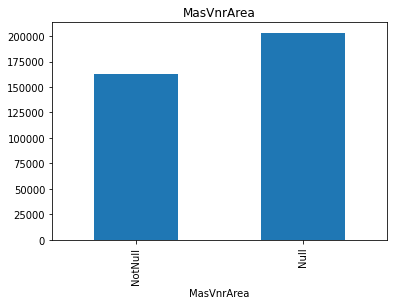

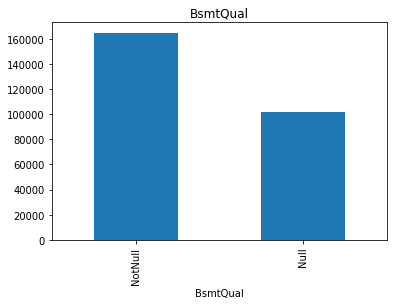

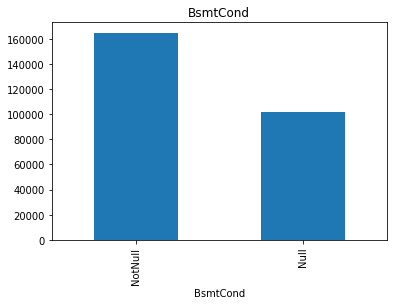

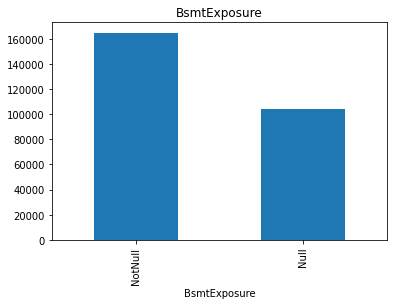

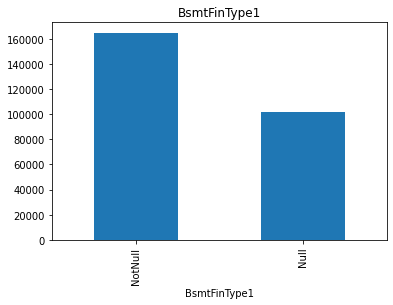

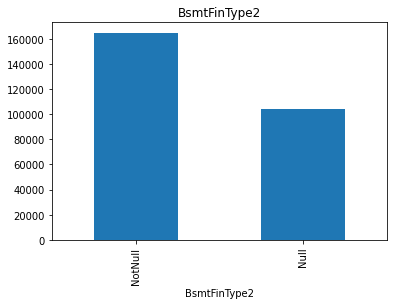

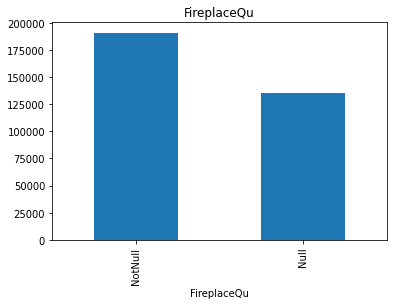

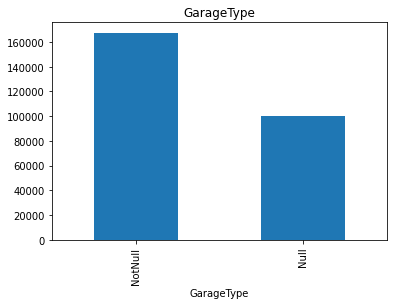

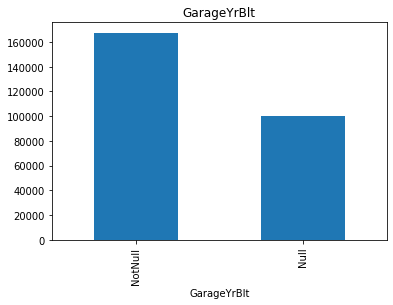

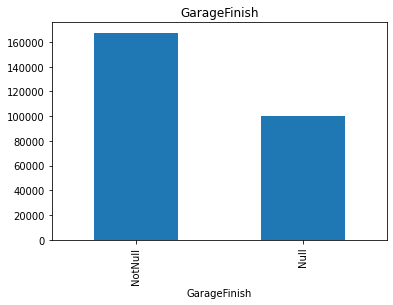

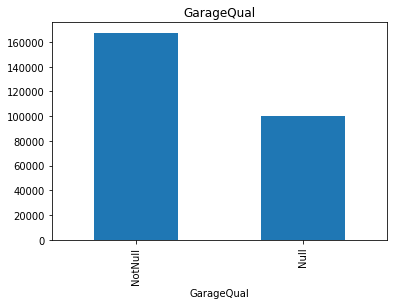

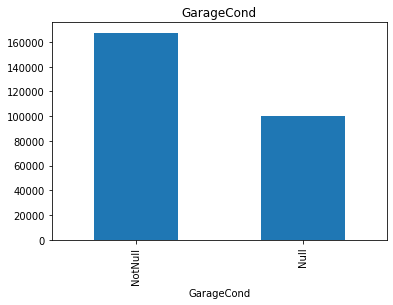

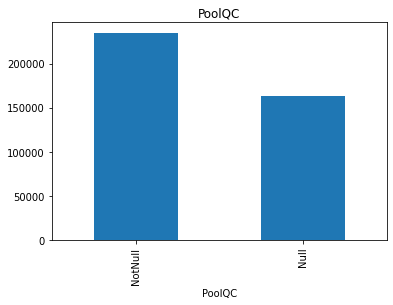

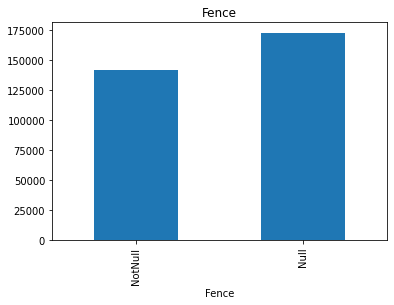

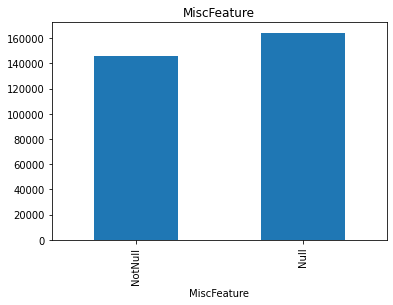

In [86]:
## Analyze Impact Of Null Values :

for _feature in miss_val:
  _test=df.copy()

  _test[_feature] = np.where(_test[_feature].isna(),"Null","NotNull")
  _test.groupby(_feature)["SalePrice"].median().plot.bar()
  plt.title(_feature)
  plt.show()




In [85]:
df.groupby("PoolArea")["SalePrice"].median()

PoolArea
0      162900
480    160000
512    235000
519    250000
555    745000
576    171000
648    181000
738    274970
Name: SalePrice, dtype: int64